In [15]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [27]:
files = glob.glob('../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251/*.txt')
files

#here is where the output will go 
path2 = '../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251.csv'
files

['../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251\\224700_Absorbance__0__236.txt',
 '../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251\\224700_Absorbance__1__237.txt',
 '../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251\\224700_Absorbance__2__238.txt',
 '../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251\\224701_Absorbance__0__239.txt',
 '../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251\\224701_Absorbance__1__240.txt',
 '../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251\\224701_Absorbance__2__241.txt',
 '../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251\\224702_Absorbance__0__242.txt',
 '../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251\\224702_Absorbance__1__243.txt',
 '../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251\\224702_Absorbance__2__244.txt',
 '../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251\\224703_Absorbance__0__245.txt',
 '../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251\\224703_Absorbance__1__246.txt',
 '../../../FeT_GOM22SU/PW_FeT_2247_2248_2250_2251\\224703_Absorbance__2__247.txt',
 '..

In [28]:
def GET_DATA(name):
    df = pd.read_csv(name, skiprows=15, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']
    #df['wl'] = df['wl']
    #bcorr = df[(df['wl']>=700) & (df['wl']<=701)]['abs'].mean() # a float corection with just 700 nm 
    bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(189,881,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

In [29]:
frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index
df

C:\Users\12532\AppData\Local\Temp\ipykernel_21732\4289825241.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['wl'] = df.index


,224700_Absorbance__0__236.txt,224700_Absorbance__1__237.txt,224700_Absorbance__2__238.txt,224701_Absorbance__0__239.txt,224701_Absorbance__1__240.txt,224701_Absorbance__2__241.txt,224702_Absorbance__0__242.txt,224702_Absorbance__1__243.txt,224702_Absorbance__2__244.txt,224703_Absorbance__0__245.txt,...,225122_Absorbance__0__502.txt,225122_Absorbance__1__503.txt,225122_Absorbance__2__504.txt,225123_Absorbance__0__505.txt,225123_Absorbance__1__506.txt,225123_Absorbance__2__507.txt,225124_Absorbance__0__508.txt,225124_Absorbance__1__509.txt,225124_Absorbance__2__510.txt,wl
wl,,,,,,,,,,,,,,,,,,,,,
189,53592.160808,241468.499106,-80401.287719,106717.381360,-72376.895751,13259.055405,21042.095383,24520.044896,279.473310,56811.695806,...,-318200.747828,30925.591186,10784.403386,93134.785869,-241874.793718,60569.262215,255708.752866,89553.838695,154215.028017,189
190,52517.568683,236635.427320,-78788.342871,104567.105417,-70916.516951,12990.928367,20645.222790,24028.065884,274.067304,55672.106144,...,-311788.431569,30313.448621,10568.181432,91257.986833,-237004.324067,59361.519568,250578.114598,87746.471223,151120.944590,190
191,51457.437797,231867.279632,-77197.115051,102445.908715,-69475.915281,12726.440124,20253.351364,23542.712122,268.731360,54547.858546,...,-305462.843992,29709.436171,10354.869030,89406.571390,-232199.678346,58169.938789,245516.568224,85963.585436,148068.525337,191
192,50411.670188,227163.617014,-75627.457066,100353.593293,-68054.955914,12465.565817,19866.449546,23063.938697,263.465021,53438.849039,...,-299223.394588,29113.499495,10144.446472,87580.366719,-227460.408729,56994.411012,240523.645368,84205.014399,145057.487837,192
193,49380.167890,222524.000443,-74079.221724,98289.961187,-66653.504024,12208.280591,19484.485775,22591.700697,258.267833,52344.973649,...,-293069.492848,28525.584251,9936.894049,85779.199997,-222786.067387,55834.827375,235598.877657,82470.591177,142087.549667,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-58.773129,-0.001522,-62.788190,-0.002135,-61.646179,59.356561,-1.144967,-0.002238,-0.002316,-122.148259,...,-58.218502,-0.002263,-0.002315,-0.001517,1.141232,61.642546,18.767718,21.053356,43.134862,876
877,-62.204913,-0.001522,-66.372466,-0.002135,-65.186972,62.810389,-1.188450,-0.002238,-0.002316,-129.186363,...,-61.628847,-0.002263,-0.002315,-0.001517,1.184715,65.183339,19.881582,22.254186,45.605010,877
878,-65.767721,-0.001522,-70.090609,-0.002135,-68.860820,66.395647,-1.232745,-0.002238,-0.002316,-136.489763,...,-65.169810,-0.002263,-0.002315,-0.001517,1.229010,68.857187,21.038581,23.499774,48.167647,878


In [30]:
#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH
#this filters eveything by all that have the work 'Absorbance' with anything after it 
#and turns it into a new object 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
#edit here to make the names a 6 diget number code 
names = d.columns.str.rsplit('_', n=7).str[0]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = d.groupby(names, axis=1).mean()
df['wl'] = df.index
df

,224700,224701,224702,224703,224704,224705,224706,224707,224708,224709,...,225116,225117,225118,225119,225120,225121,225122,225123,225124,wl
wl,,,,,,,,,,,,,,,,,,,,,
189,71553.124065,15866.513671,15280.537863,96261.462606,-45938.512343,12986.462127,89858.743123,-68563.557311,-39516.236317,37331.662918,...,-114424.498042,-3317.544016,6739.203796,67998.292020,154223.373500,145190.304420,-92163.584419,-29390.248545,166492.539859,189
190,70121.551044,15547.172278,14982.451992,94340.665042,-44998.534726,12723.766999,88056.303762,-67172.889143,-38712.084659,36594.697788,...,-112114.648377,-3245.331796,6609.420672,66628.176329,151120.621838,142268.151811,-90302.267172,-28794.939222,163148.510137,190
191,68709.200793,15232.144519,14688.264948,92445.589795,-44071.462656,12464.638181,86278.129995,-65801.151511,-37918.915174,35867.493403,...,-109836.093937,-3174.168633,6481.311525,65276.589522,148059.766889,139385.472372,-88466.179597,-28207.722722,159849.559666,191
192,67315.943379,14921.401065,14397.951088,90576.063477,-43157.206959,12209.051302,84524.057370,-64448.214699,-37136.652372,35149.984713,...,-107588.621279,-3104.046893,6354.865509,63943.405458,145040.523860,136541.997682,-86655.149540,-27628.543666,156595.382535,192
193,65941.648870,14614.912585,14111.484769,88731.912701,-42255.678461,11956.981992,82793.921440,-63113.948993,-36365.220757,34442.106666,...,-105372.016959,-3034.958940,6230.071782,62628.497998,142062.607959,133737.459322,-84869.004849,-27057.346671,153385.672833,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-40.520947,-0.763918,-0.383173,-61.646908,65.437939,-6.846896,-19.786075,58.974176,-0.004037,19.781944,...,69.341769,89.506241,30.873954,87.401425,62.856017,43.740415,-19.407693,20.927420,27.651978,876
877,-42.859634,-0.792906,-0.397668,-65.187701,69.256110,-7.240228,-20.937284,62.413509,-0.004037,20.933220,...,73.334355,94.656957,32.643732,92.430299,66.471881,46.255083,-20.544475,22.122179,29.246926,877
878,-45.286618,-0.822436,-0.412433,-68.861549,73.219954,-7.648343,-22.132303,65.984002,-0.004037,22.128306,...,77.477299,100.001544,34.479841,97.648429,70.223802,48.864313,-21.724796,23.361560,30.902000,878


Text(0.5, 1.0, 'BC_ABS_BLU22_2226_GB')

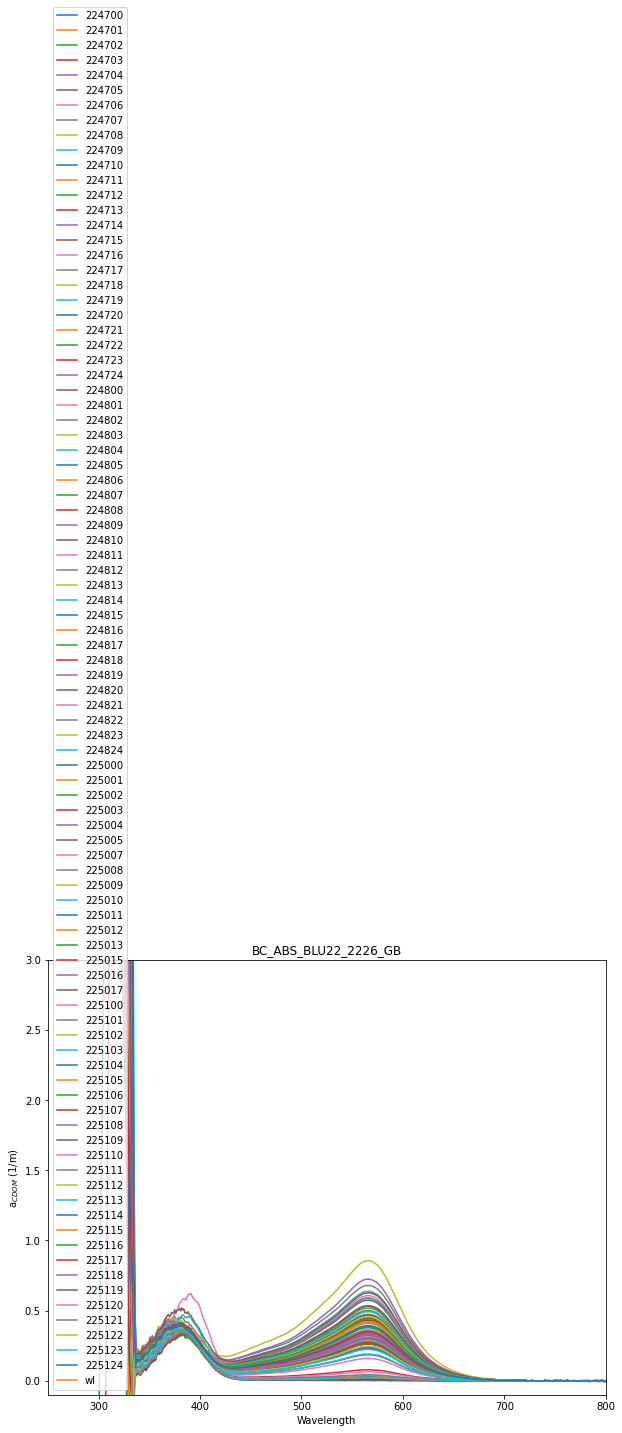

In [31]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,3)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("BC_ABS_BLU22_2226_GB")


In [32]:
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    
    abs_562 = df[(df['wl']==562)][col].mean()
    
    ydata = df[(df['wl']>=450) & (df['wl']<=700)][col]
    xdata = df[(df['wl']>=450) & (df['wl']<=700)]['wl']
    ydata = np.asarray(ydata, dtype=float).ravel()
    xdata = np.asarray(xdata, dtype=float).ravel()
    
    inter = scipy.integrate.simps(ydata, x=xdata, even='avg')
    
    dict = {'sample':[columnName],
        'abs_562':[abs_562], 
        'intagration':[inter],}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')
ss_outs.to_csv(path2)

ss_outs

,abs_562,intagration
sample,,
224700,0.018348,2.216059
224701,0.009953,1.319029
224702,0.029601,3.469266
224703,0.078359,8.952339
224704,0.376589,41.529260
...,...,...
225120,0.293187,32.176320
225121,0.296309,32.474031
225122,0.244762,26.828828


EXPERIMENTAL